In [23]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
plt.rc("axes.spines", top=False, right=False)
sns.set_style(style='darkgrid', rc=None)
style.use('fivethirtyeight')
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]
sns.set_palette(five_thirty_eight)

In [24]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None)

#imports cleaned data
df_csv3 = pd.read_csv('data_post_EDA.csv')



In [25]:
df_csv3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          54231 non-null  int64  
 1   member_id                   54231 non-null  int64  
 2   loan_amount                 54231 non-null  float64
 3   funded_amount_inv           54231 non-null  float64
 4   term                        54231 non-null  float64
 5   int_rate                    54231 non-null  float64
 6   instalment                  54231 non-null  float64
 7   grade                       54231 non-null  object 
 8   sub_grade                   54231 non-null  object 
 9   employment_length           54231 non-null  object 
 10  home_ownership              54231 non-null  object 
 11  annual_inc                  54231 non-null  float64
 12  verification_status         54231 non-null  object 
 13  issue_date                  542

In [143]:
#data types not preserved from earleir, therefore change columns as previously:


#term changes to category where set number of options available
df_csv3["term"] = pd.to_numeric(df_csv3["term"], errors='coerce')


df_csv3["employment_length"] = df_csv3["employment_length"].astype('category')
df_csv3["home_ownership"] = df_csv3["home_ownership"].astype('category')
df_csv3[["collections_12_mths_ex_med", "verification_status", "loan_status", "purpose", "policy_code",
         "application_type", "payment_plan"]] = df_csv3[["collections_12_mths_ex_med", "verification_status", "loan_status", "purpose", "policy_code", "application_type", "payment_plan"]].astype('category')

#changes dates to datetime category
df_csv3["issue_date"] = pd.to_datetime(df_csv3["issue_date"])
df_csv3["earliest_credit_line"] = pd.to_datetime(df_csv3["earliest_credit_line"])
df_csv3["last_payment_date"] = pd.to_datetime(df_csv3["last_payment_date"])
df_csv3["last_credit_pull_date"] = pd.to_datetime(df_csv3["last_credit_pull_date"])

Summarise currently what percentage of the loans are recovered against the investor funding and the total amount funded. Visualise your results on an appropriate graph.
I realised this would have to be done on data that had not undergone a log transformation, and so loaded in the original data set

In [30]:
df_csv4 = pd.read_csv('data.csv')

In [32]:
#the total percentage of loans recovered against investor funding is as follows
percentage_recovered_inv = (df_csv4["total_payment"].sum() / df_csv4["funded_amount_inv"].sum())*100
print(percentage_recovered_inv)

93.25685229150591


<Axes: xlabel='funded_amount_inv', ylabel='total_payment'>

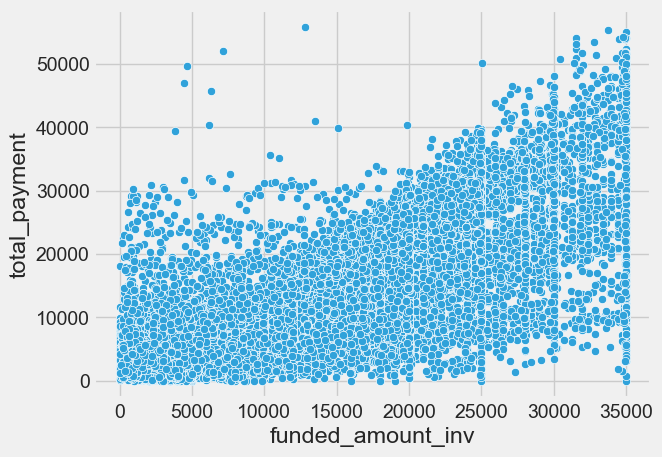

In [39]:
sns.scatterplot(x = df_csv4["funded_amount_inv"], y = df_csv4["total_payment"])

In [34]:
#the total percentage of loands recovered against amount funded is as follows
percentage_recovered_funded = (df_csv4["total_payment"].sum() / df_csv4["funded_amount"].sum())*100
print(percentage_recovered_funded)

96.664914467048


<Axes: xlabel='funded_amount', ylabel='total_payment'>

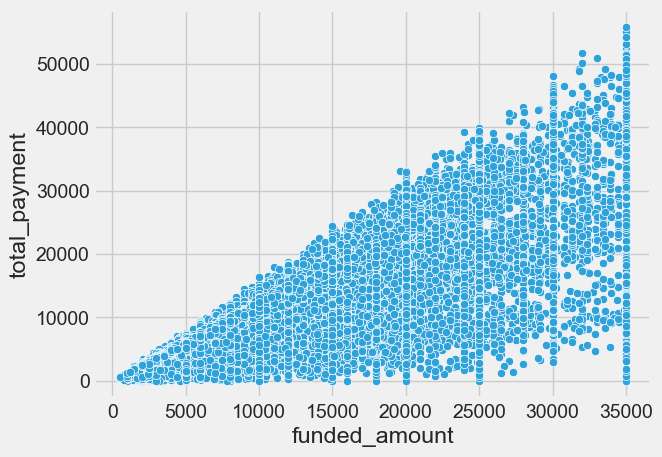

In [40]:
sns.scatterplot(x = df_csv4["funded_amount"], y = df_csv4["total_payment"])

Additionally visualise what percentage of the total amount would be recovered up to 6 months' in the future.
To calculate this, I worked out which loans are still active, i.e. which ones will be providing monthly payments
I then calculated how much they would provide over the next 6 months and added this to the sum of the total payment to calculate the new recovery percentages

In [129]:
active_loans = df_csv4[df_csv4["loan_status"] == "Current"]
active_loans["amount_recovered_6mths"] = active_loans["instalment"]*6
print (active_loans["amount_recovered_6mths"])


#some loans will be payed off before the 6 months, so we should check for all active loans how much is left to pay
active_loans["left_to_pay_active"] = active_loans["out_prncp"]
print (active_loans["left_to_pay_active"])



#if the amount paid in 6 months is higher than the amount left to pay, we should replace this with the amount left to pay

portion_recovered_over_6mths = active_loans.query('amount_recovered_6mths < left_to_pay_active')
portion_recovered_over_6mths["amount_recovered_6mths"].sum()

portion_recovered_over_remaining_payment = active_loans.query('amount_recovered_6mths > left_to_pay_active')
total_amount_recovered_6mths = portion_recovered_over_6mths["amount_recovered_6mths"].sum() + portion_recovered_over_remaining_payment["left_to_pay_active"].sum()



0        1492.92
1        2445.12
4        2739.24
5         499.20
8        1364.88
          ...   
47025    1807.92
49857    1046.28
51195    2399.82
52986     518.88
53334    4746.96
Name: amount_recovered_6mths, Length: 19268, dtype: float64
0         5529.70
1         9102.83
4        10297.47
5         1842.68
8         8480.91
           ...   
47025     7281.05
49857      191.25
51195     3373.71
52986      798.26
53334    17375.32
Name: left_to_pay_active, Length: 19268, dtype: float64


C:\Users\danie\AppData\Local\Temp\ipykernel_26908\4272433611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_loans["amount_recovered_6mths"] = active_loans["instalment"]*6
C:\Users\danie\AppData\Local\Temp\ipykernel_26908\4272433611.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_loans["left_to_pay_active"] = active_loans["out_prncp"]


In [130]:
#the total percentage of loans recovered against investor funding in 6 months time is as follows
percentage_recovered_inv = ((df_csv4["total_payment"].sum() + total_amount_recovered_6mths) / df_csv4["funded_amount_inv"].sum())*100
print(percentage_recovered_inv)

100.44772666592922


Task 2 - calculating loss

In [73]:
#finding loans that are 'charged off'
charged_off  = df_csv4[df_csv4['loan_status'].str.contains('Charged Off')]

In [96]:
#what percentage of loans are charged off
per_charged_off = (len(charged_off) / len(df_csv4["total_payment"])) *100
print(per_charged_off)



10.95130091645


In [79]:
#amount paid off before these loans were charged off
charged_off_paid_off = charged_off["total_payment"].sum()
charged_off_total_loan = charged_off["funded_amount"].sum()
per_charged_off_paid_off = (charged_off_paid_off / charged_off_total_loan) * 100
print(per_charged_off_paid_off)

39247128.383503474
74551975.0
52.64398211248391


Task 3: calculating projected loss

In [104]:
#first calculate the amount paid in first 36 months (will cover all for the 36 term, with 24 months remaining for the 60 month)
projected_loss_36mths = (charged_off["instalment"] * 36).sum()

charged_off_df = df_csv4[df_csv4["loan_status"] == "Charged Off"] 
charged_off_60mth_df = charged_off_df[charged_off_df["term"] == "60 months"]        
projected_loss_remaining24 = (charged_off_60mth_df["instalment"]*24).sum()

#by adding the two together we get the total amount these loans would have resulted in
# and can then calculate loss by minusing
charged_off_projected_loss = projected_loss_36mths + projected_loss_remaining24 - charged_off_paid_off 
#the total projected loss for charged off loans
print(charged_off_projected_loss)

66986988.69649651


Task 4: projected loss
There are customers who are currently behind with their loan payments. This subset of customers represent a risk to company revenue.


What percentage do users' in this bracket currently represent as a percentage of all loans? Calculate the total amount of customers in this bracket and how much loss the company would incur their status was changed to Charged Off. What is the projected loss of these loans if the customer were to finish the full loans term?


If customers late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?

In [138]:
#calculate the percentage of loans at risk, i.e. those with a late status

at_risk = ["Late (31-120 days)", "Late (16-30 days)"]

behind_on_payments_df = df_csv4[df_csv4["loan_status"].isin(at_risk)]

percent_at_risk_all_loans = (len(behind_on_payments_df)/len(df_csv4))*100
print(percent_at_risk_all_loans)

1.2649591562021723


In [141]:
#calculate loss if these loans were changed to charged off

behind_loss = behind_on_payments_df["out_prncp"].sum()
print(behind_loss)

6024730.62


In [142]:
#calculate the percentage of lost revenue of charged off loans and late loans(if changed to charged off)

total_revenue = df_csv4["total_payment"].sum() + df_csv4["out_prncp"].sum()

percentage_loss_chargedoff_late = ((behind_loss + charged_off_projected_loss)/ total_revenue)*100
print(percentage_loss_chargedoff_late)

9.076343236123009


Task 5
compare columns which might be indicators against customers who have already stopped paying and customers who are currently behind on payments.


Here are some example columns that might indicate that a user might not pay the loan:

Does the grade of the loan have effect on customers not paying?
Is the purpose for the loan likely to have an effect?
Does the home_ownership value contribute to the likelihood a customer won't pay?
To help identify which columns will be of interest, create a subset of these users.

In [146]:
#will use df_csv3 as this has undergone cleaning of data

#firstly to create subsets for:
# fully paid, charged off and late loans(at risk)

fully_paid = ["Fully Paid"]
fully_paid_df = df_csv3[df_csv3["loan_status"].isin(fully_paid)]

at_risk = ["Late (31-120 days)", "Late (16-30 days)"]
late_df = df_csv3[df_csv3["loan_status"].isin(at_risk)]

charged_off_f = ["Charged Off"]
chargedoff_df = df_csv3[df_csv3["loan_status"].isin(charged_off_f)]



C:\Users\danie\AppData\Local\Temp\ipykernel_26908\3735154173.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='grade', data= fully_paid_df, order=fully_paid_df["grade"].value_counts().index ,palette = 'rocket').set(title = 'Grades for paid off loans')


[Text(0.5, 1.0, 'Grades for paid off loans')]

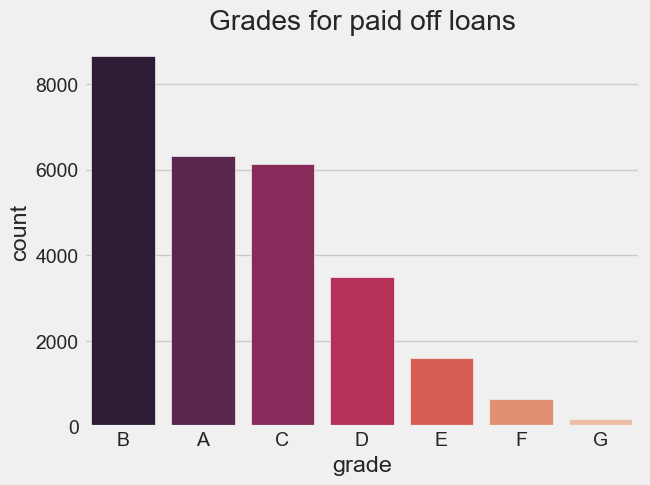

In [168]:
#Grade of loans

sns.countplot(x='grade', data= fully_paid_df, order=fully_paid_df["grade"].value_counts().index ,palette = 'rocket').set(title = 'Grades for paid off loans')

In [155]:
fully_paid_df.grade.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

grade
B    32.0%
A    23.4%
C    22.7%
D    13.0%
E     5.9%
F     2.4%
G     0.6%
Name: proportion, dtype: object

C:\Users\danie\AppData\Local\Temp\ipykernel_26908\1316085209.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='grade', data= late_df, order=late_df["grade"].value_counts().index ,palette = 'rocket').set(title = 'Grades for late loans')


[Text(0.5, 1.0, 'Grades for late loans')]

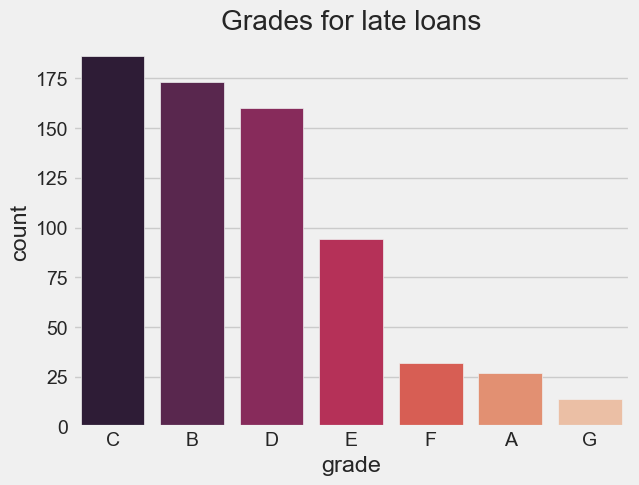

In [169]:
sns.countplot(x='grade', data= late_df, order=late_df["grade"].value_counts().index ,palette = 'rocket').set(title = 'Grades for late loans')

In [156]:
late_df.grade.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

grade
C    27.1%
B    25.2%
D    23.3%
E    13.7%
F     4.7%
A     3.9%
G     2.0%
Name: proportion, dtype: object

C:\Users\danie\AppData\Local\Temp\ipykernel_26908\4417125.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='grade', data= chargedoff_df, order=chargedoff_df["grade"].value_counts().index ,palette = 'rocket').set(title = 'Grades for charged off loans')


[Text(0.5, 1.0, 'Grades for charged off loans')]

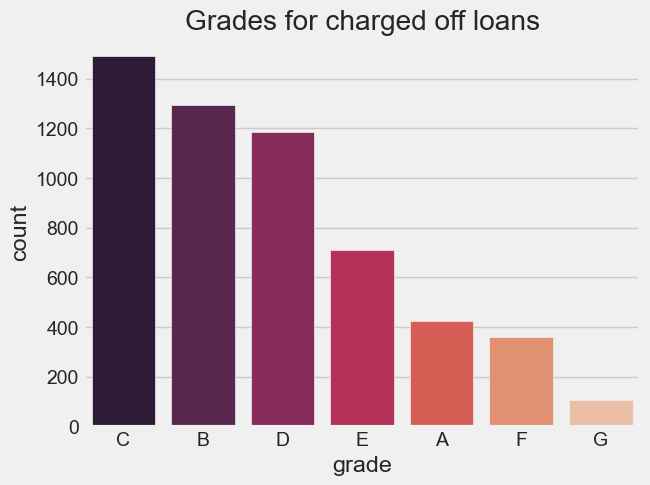

In [170]:
sns.countplot(x='grade', data= chargedoff_df, order=chargedoff_df["grade"].value_counts().index ,palette = 'rocket').set(title = 'Grades for charged off loans')

In [171]:
chargedoff_df.grade.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

grade
C    26.7%
B    23.2%
D    21.3%
E    12.7%
A     7.6%
F     6.5%
G     1.9%
Name: proportion, dtype: object

As we can see above, less than 25% of grades for paid off loans are D, E, F or G
This increased to around 47% for late loans
And 43$ for charged off loans
This suggests a higher grade indicates a customer is more likely to pay off their loan


Now to investigate the purpose of the loans

C:\Users\danie\AppData\Local\Temp\ipykernel_26908\634678637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purpose', data= fully_paid_df, order=fully_paid_df["purpose"].value_counts().index ,palette = 'rocket').set(title = 'Purpose of paid off loans')


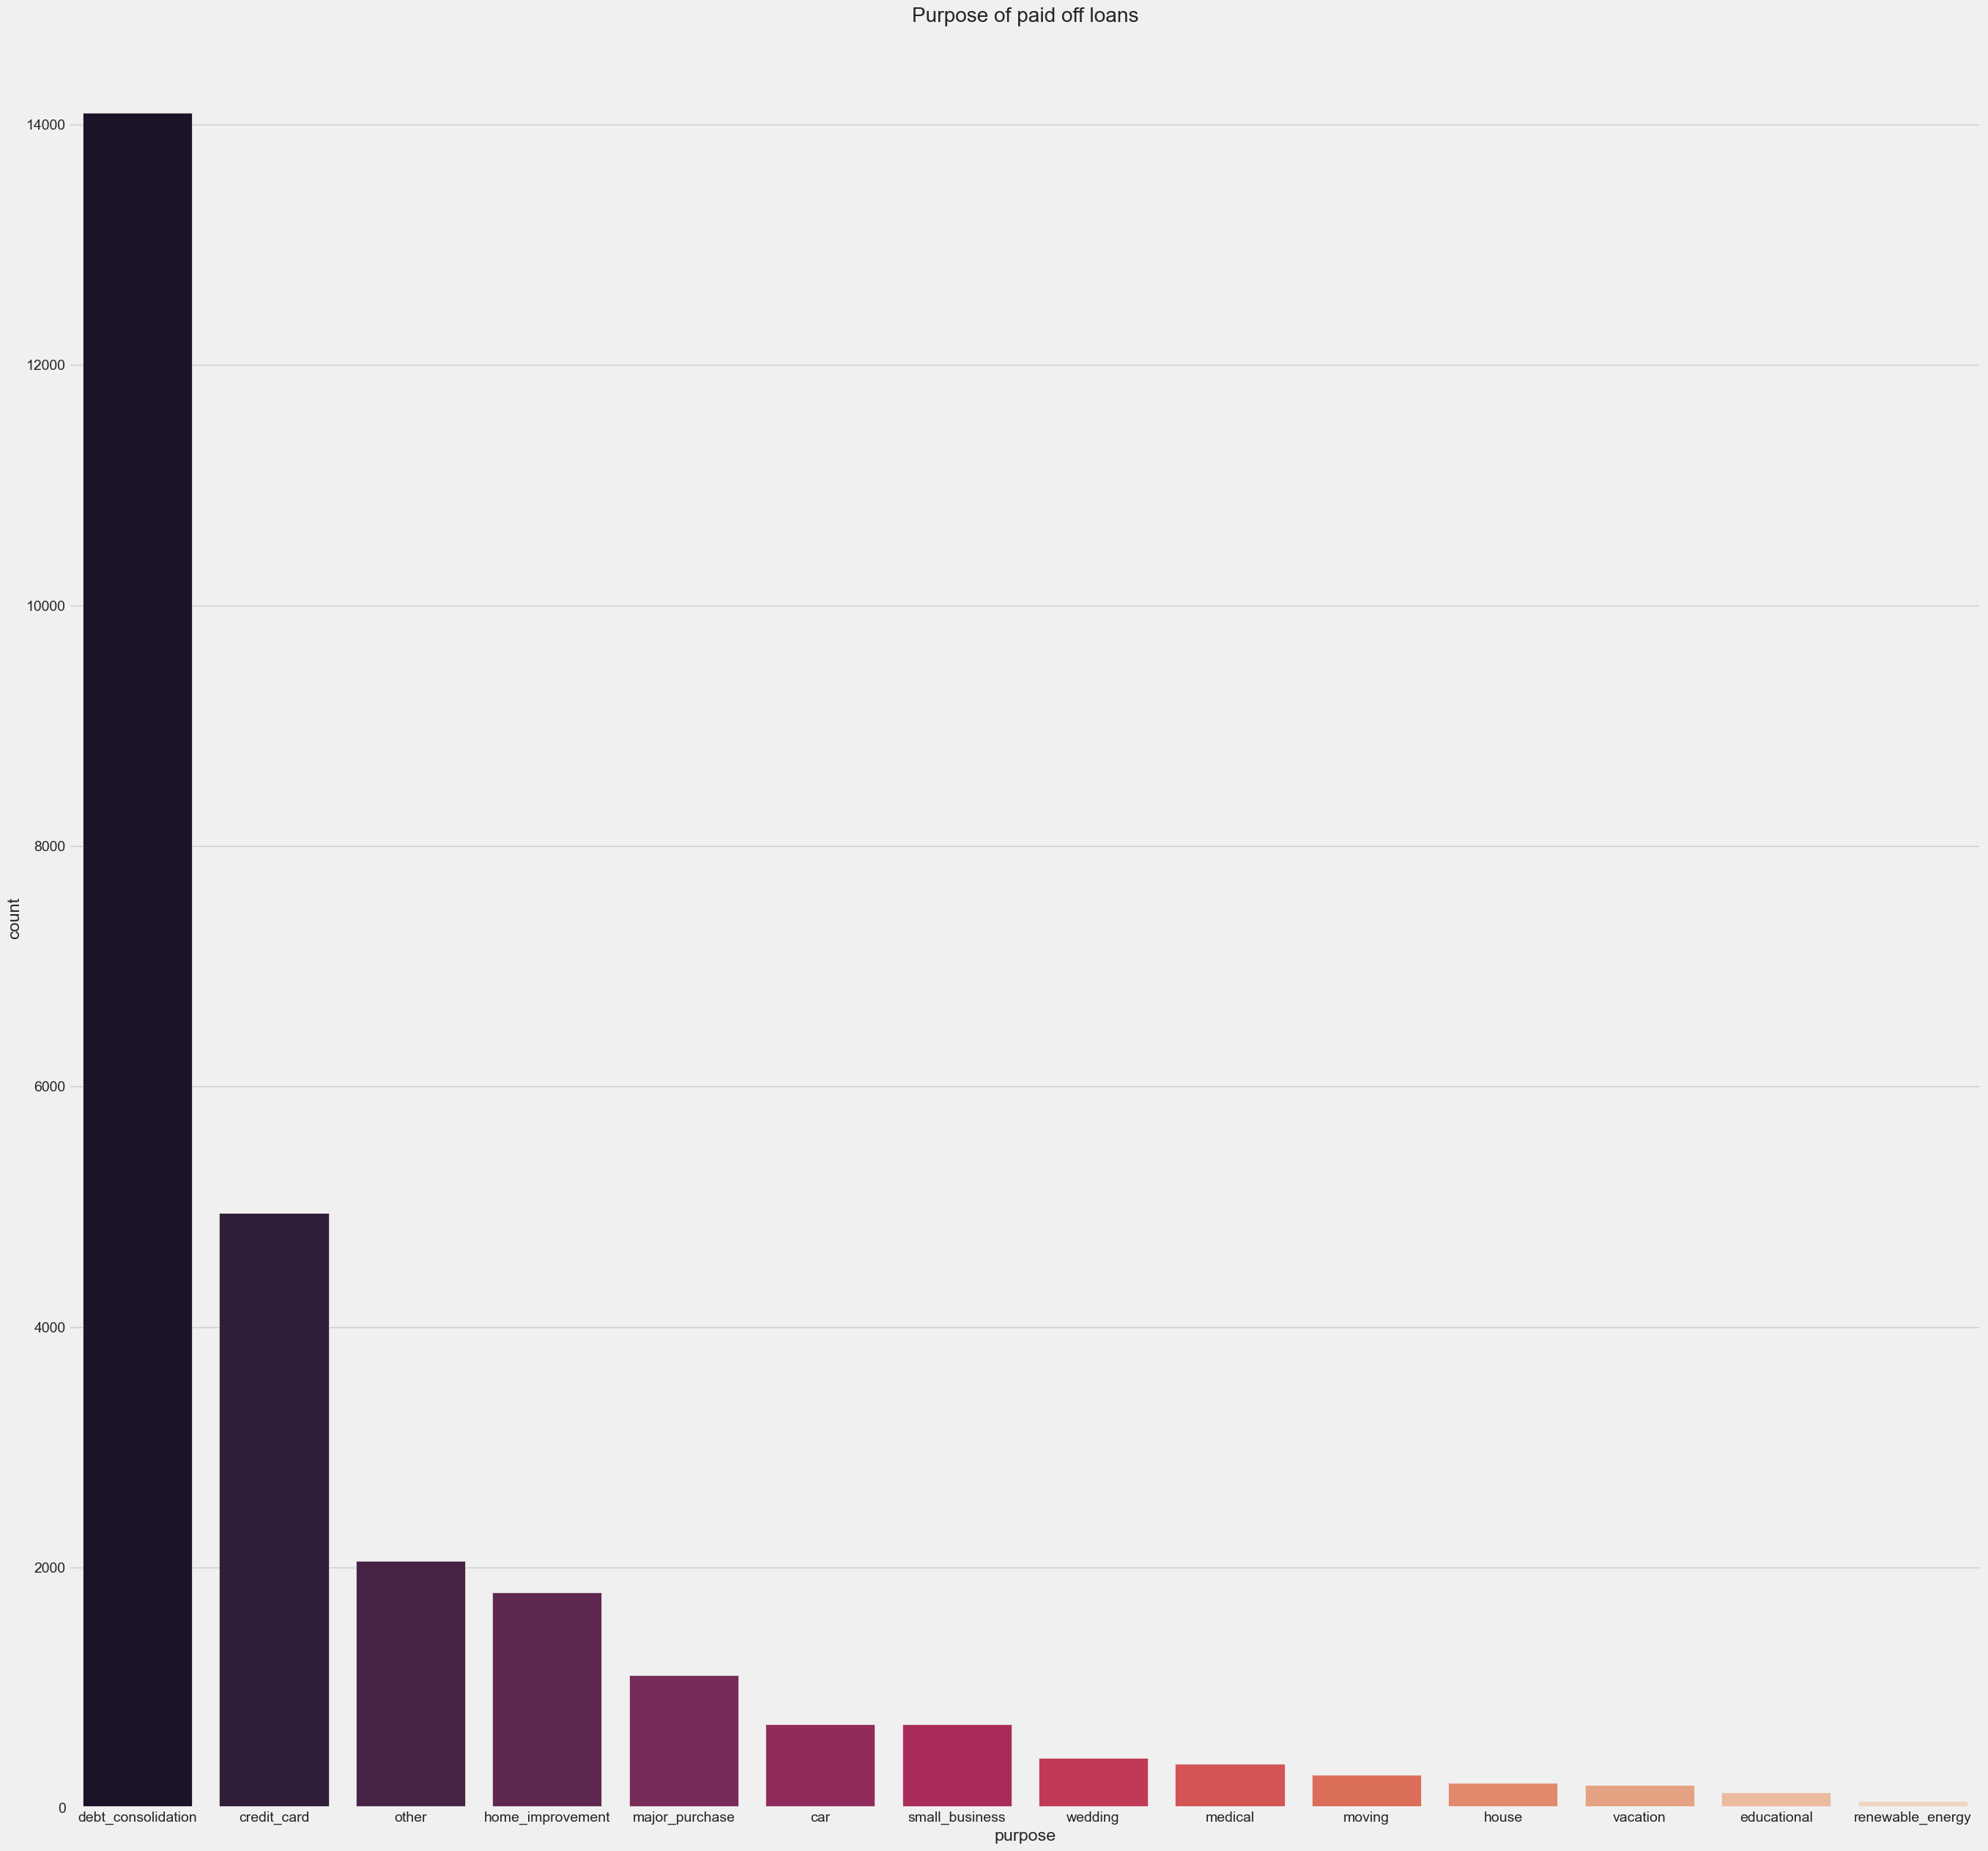

In [172]:
fig, ax = plt.subplots(figsize=(30,30))
sns.countplot(x='purpose', data= fully_paid_df, order=fully_paid_df["purpose"].value_counts().index ,palette = 'rocket').set(title = 'Purpose of paid off loans')
plt.show()

In [165]:
fully_paid_df.purpose.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

purpose
debt_consolidation    52.1%
credit_card           18.3%
other                  7.6%
home_improvement       6.6%
major_purchase         4.1%
car                    2.6%
small_business         2.6%
wedding                1.5%
medical                1.4%
moving                 1.0%
house                  0.8%
vacation               0.7%
educational            0.5%
renewable_energy       0.2%
Name: proportion, dtype: object

C:\Users\danie\AppData\Local\Temp\ipykernel_26908\2642748575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purpose', data= late_df, order=late_df["purpose"].value_counts().index ,palette = 'rocket').set(title = 'Purpose of late loans')


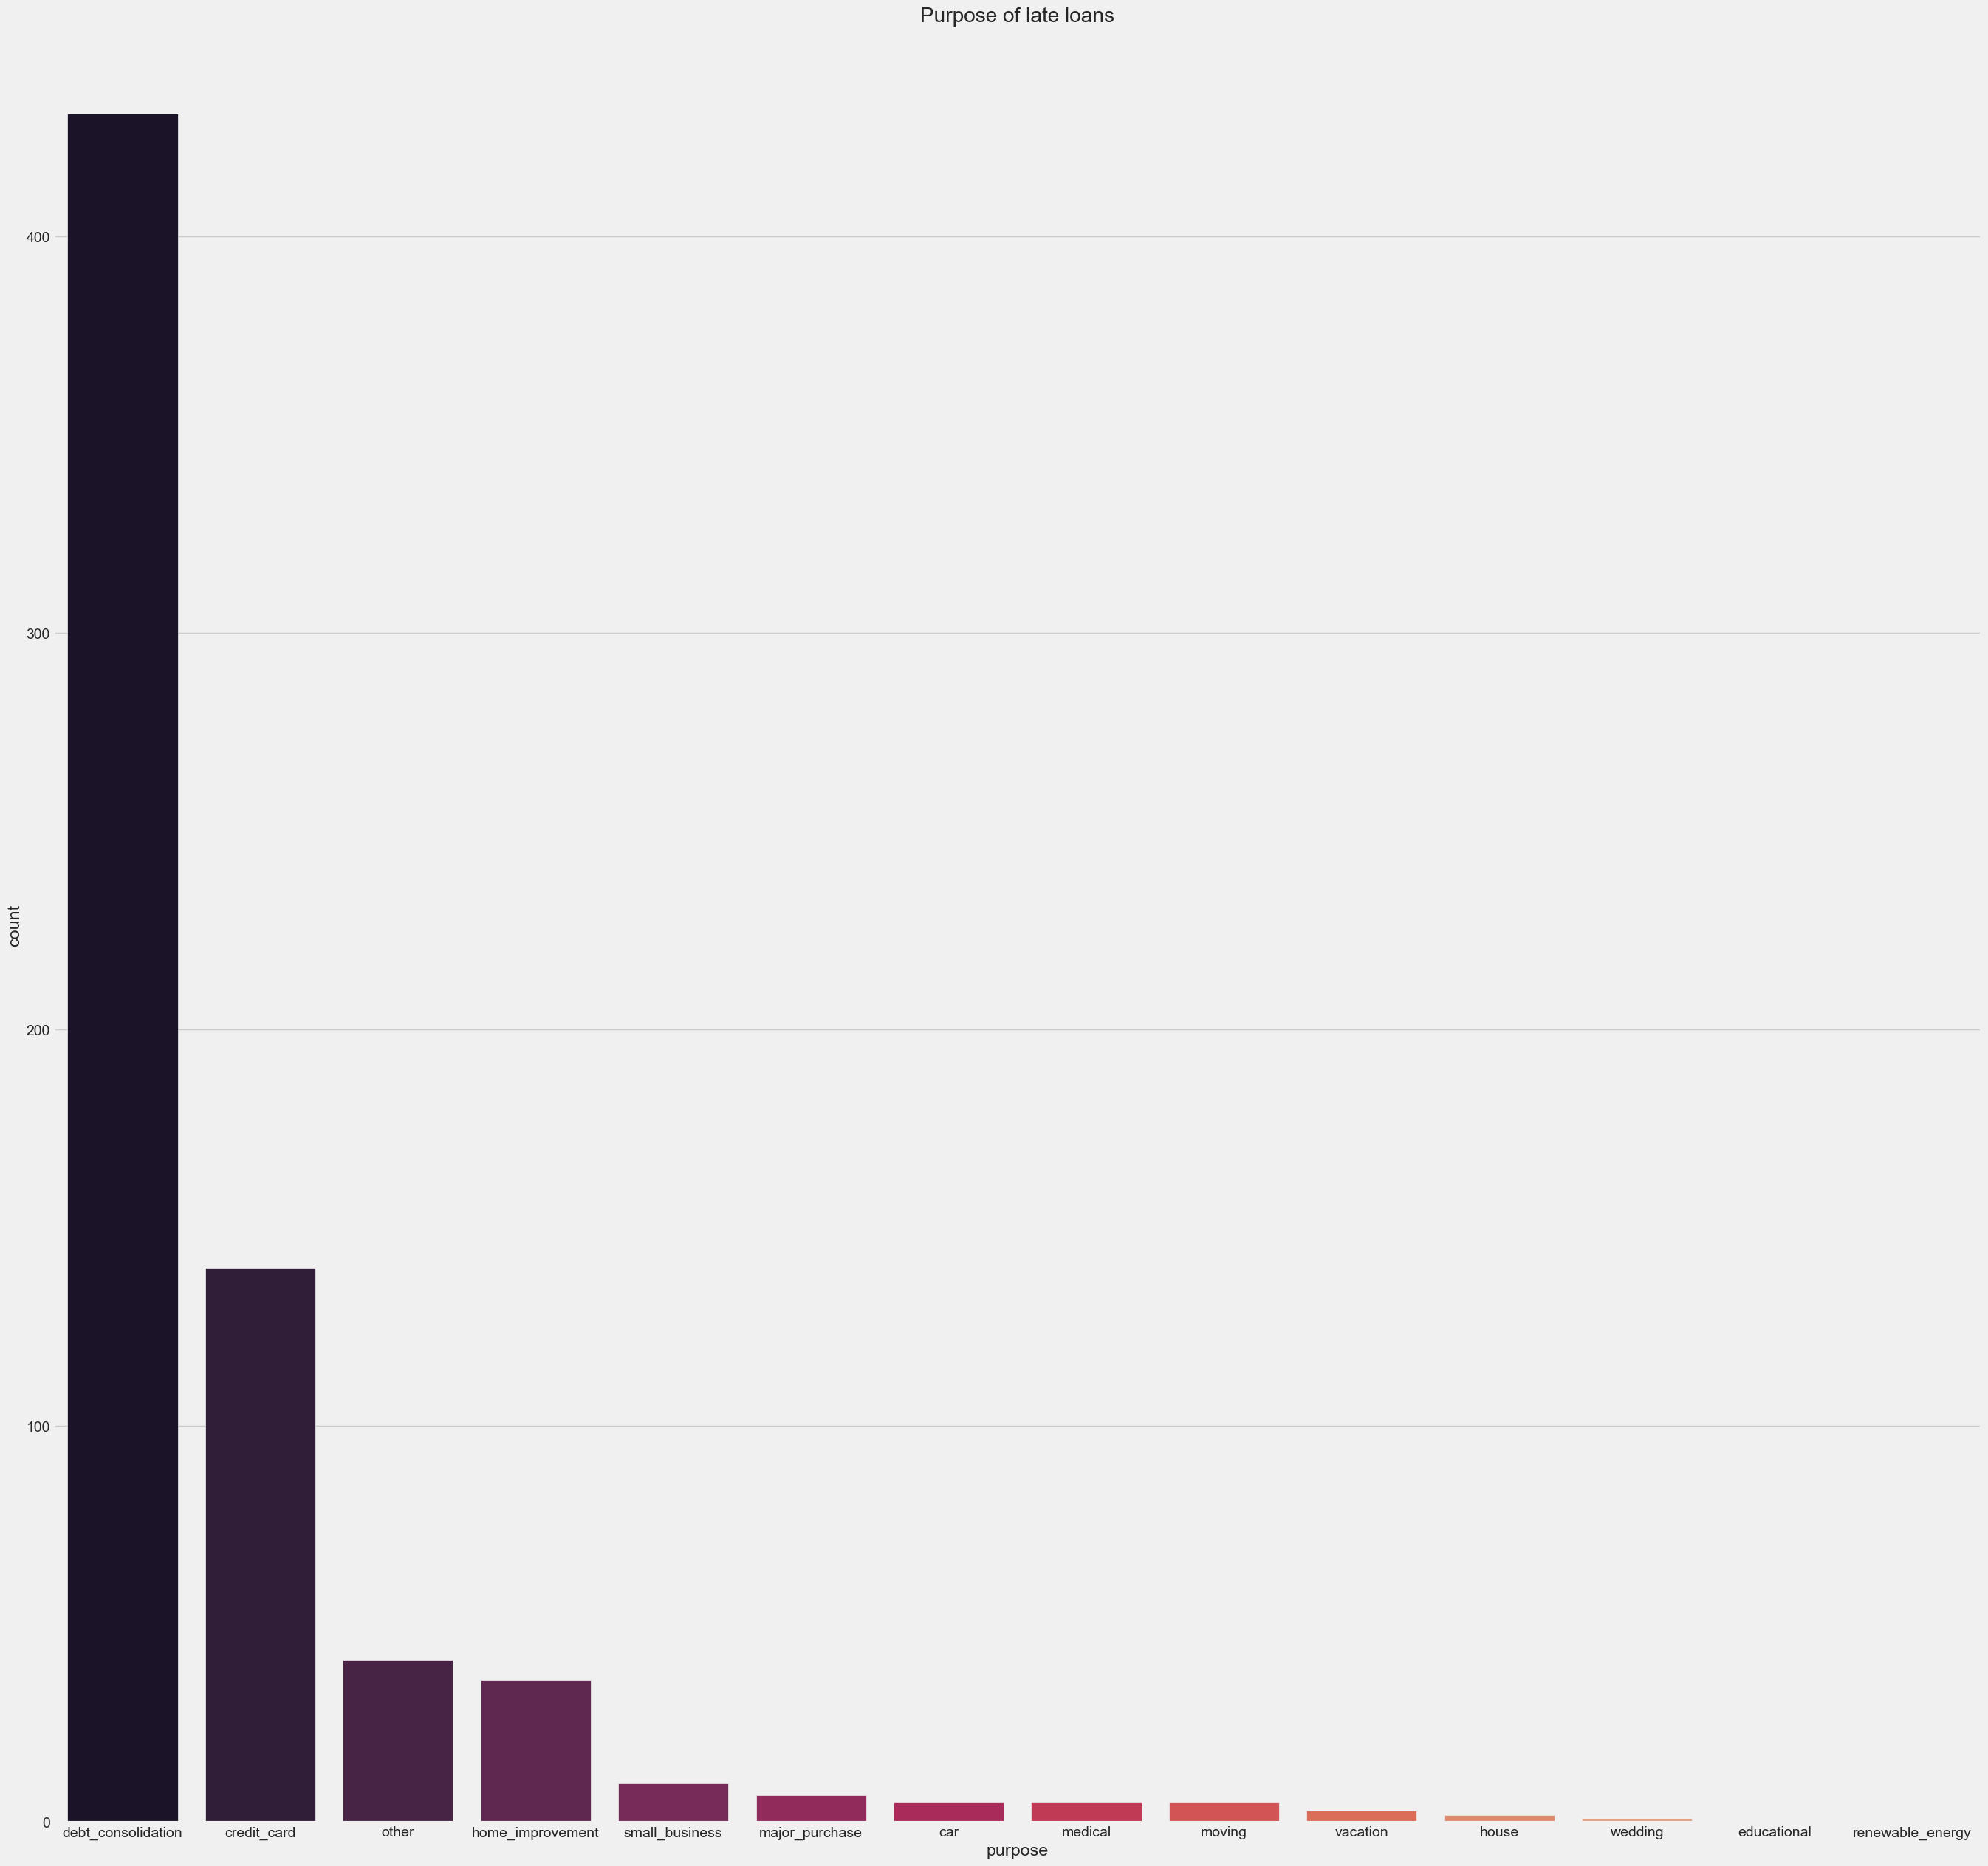

In [173]:
fig, ax = plt.subplots(figsize=(30,30))
sns.countplot(x='purpose', data= late_df, order=late_df["purpose"].value_counts().index ,palette = 'rocket').set(title = 'Purpose of late loans')
plt.show()

In [174]:
late_df.purpose.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

purpose
debt_consolidation    62.8%
credit_card           20.4%
other                  6.0%
home_improvement       5.2%
small_business         1.5%
major_purchase         1.0%
car                    0.7%
medical                0.7%
moving                 0.7%
vacation               0.4%
house                  0.3%
wedding                0.1%
educational            0.0%
renewable_energy       0.0%
Name: proportion, dtype: object

C:\Users\danie\AppData\Local\Temp\ipykernel_26908\3827781888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purpose', data= chargedoff_df, order=chargedoff_df["purpose"].value_counts().index ,palette = 'plasma').set(title = 'Purpose of charged off loans')


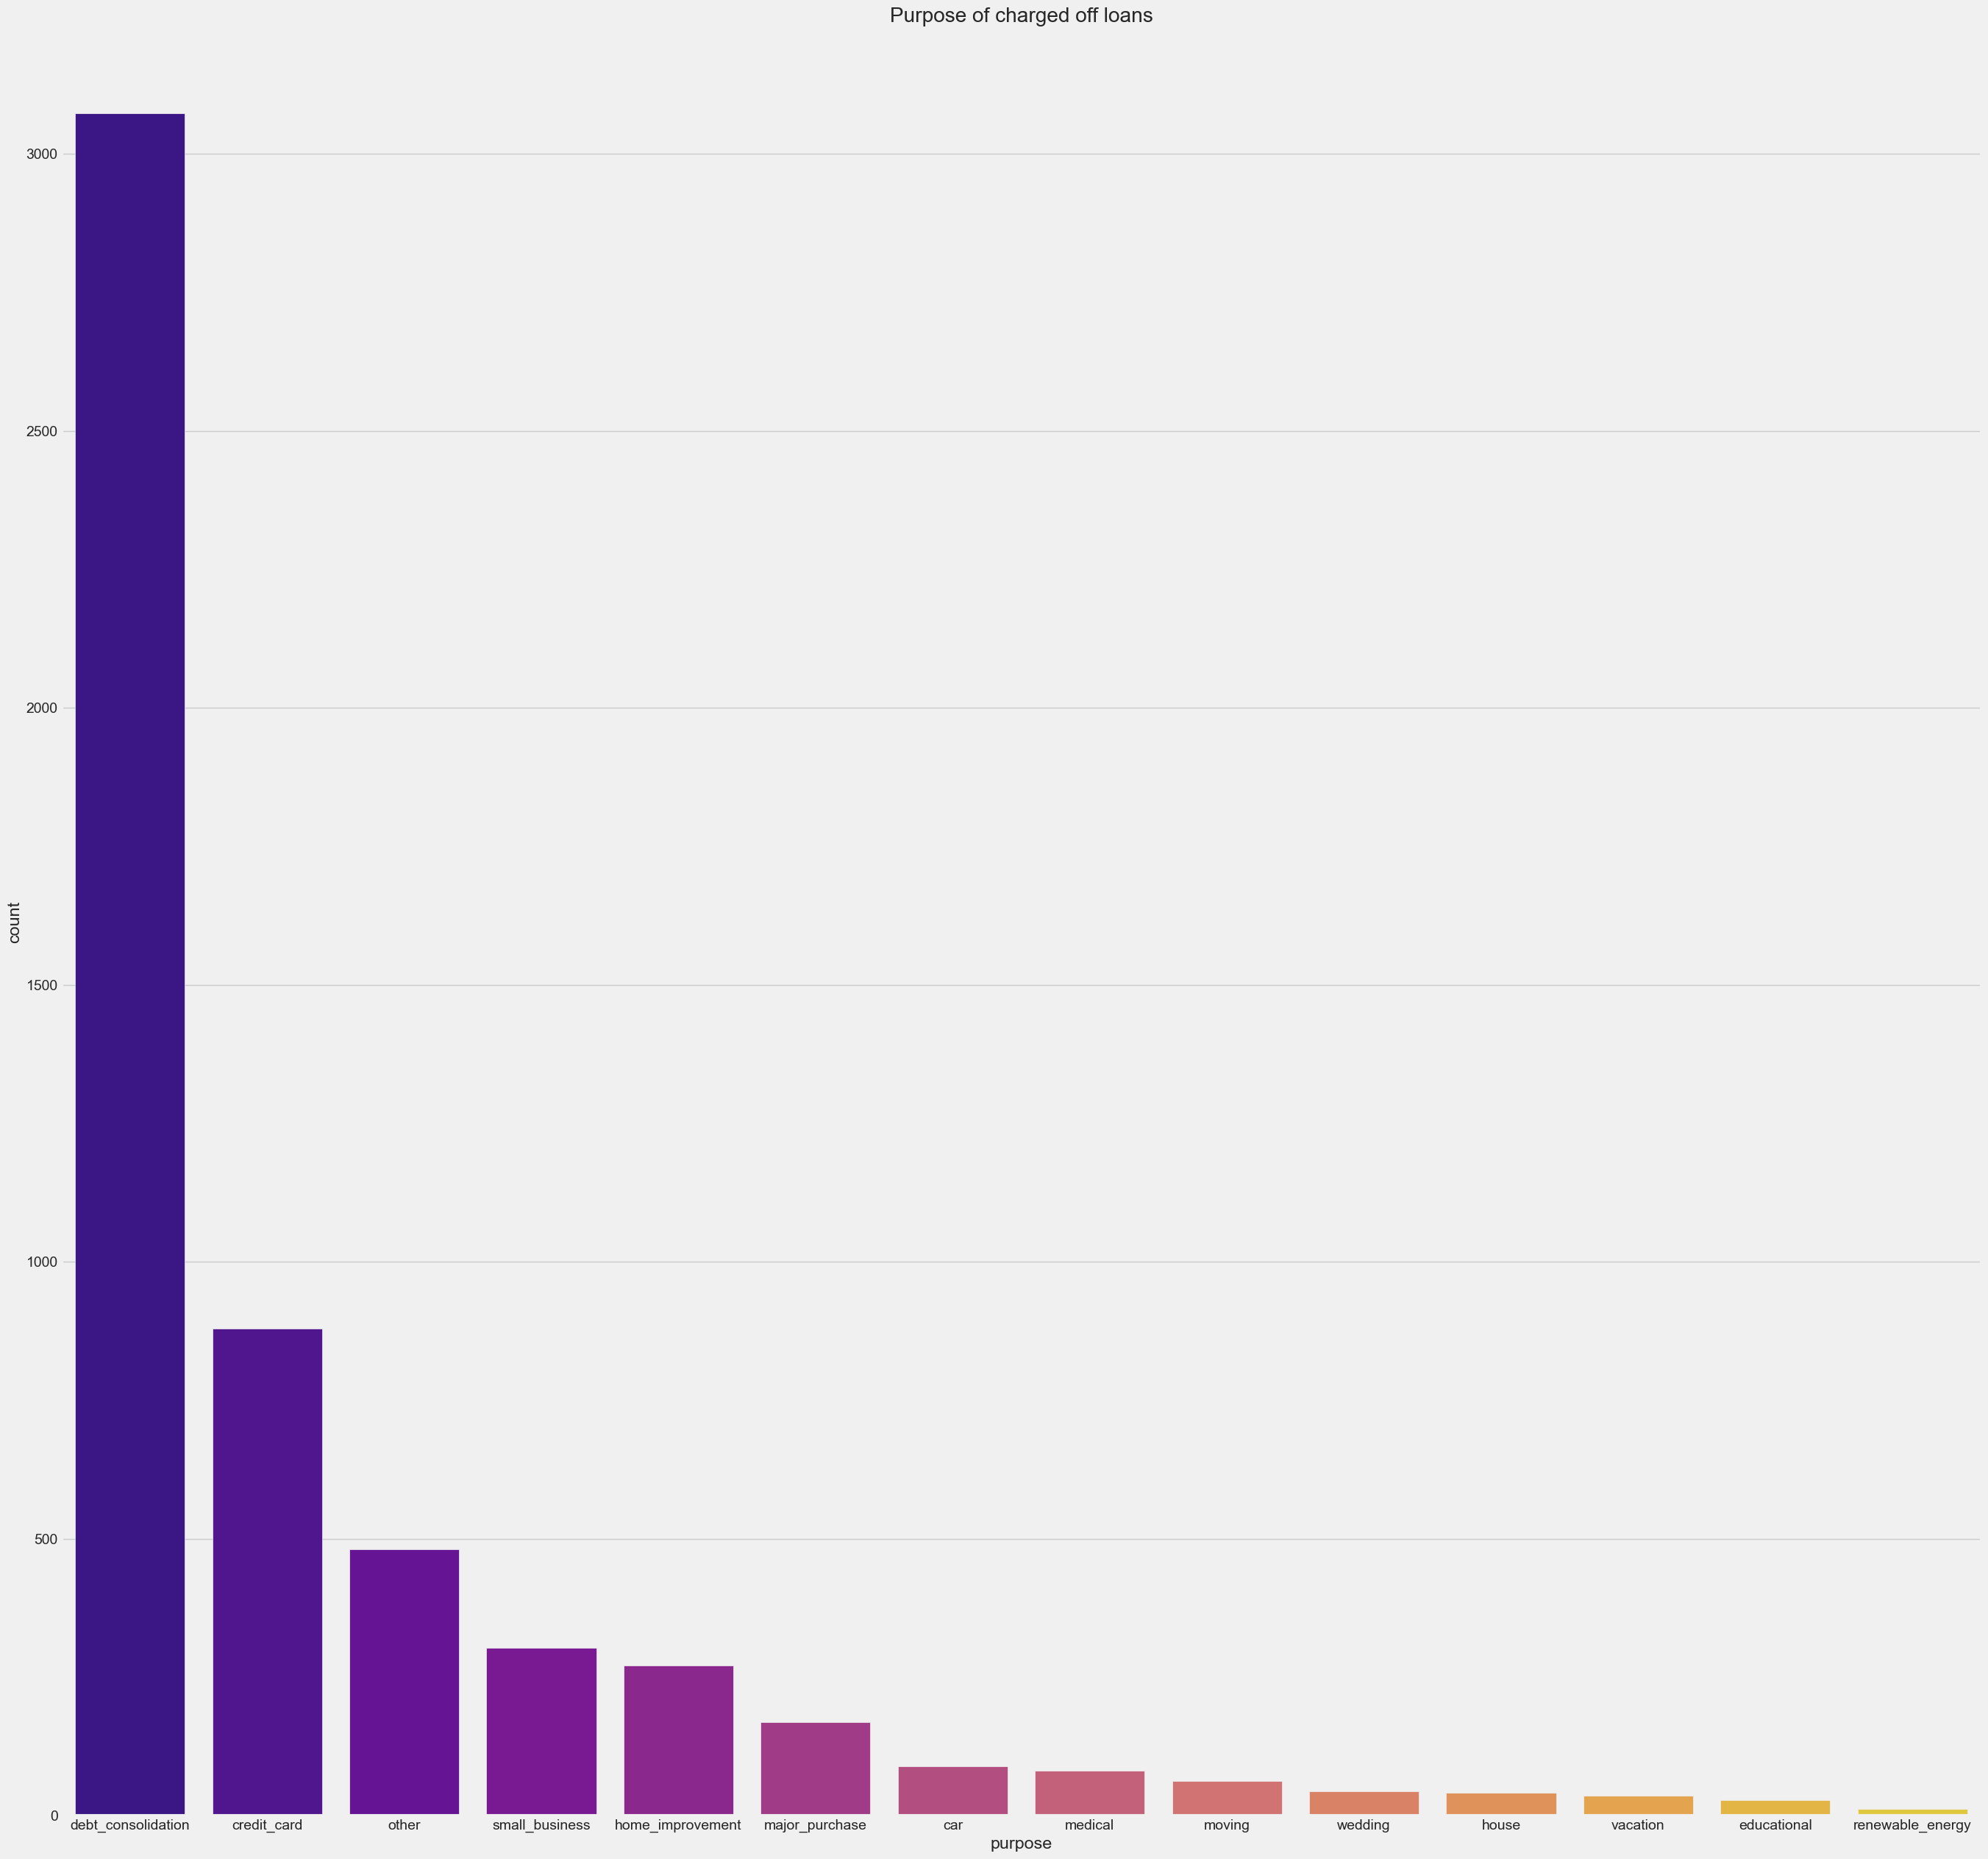

In [175]:
fig, ax = plt.subplots(figsize=(30,30))
sns.countplot(x='purpose', data= chargedoff_df, order=chargedoff_df["purpose"].value_counts().index ,palette = 'plasma').set(title = 'Purpose of charged off loans')
plt.show()

In [176]:
chargedoff_df.purpose.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

purpose
debt_consolidation    55.2%
credit_card           15.8%
other                  8.6%
small_business         5.4%
home_improvement       4.9%
major_purchase         3.0%
car                    1.6%
medical                1.5%
moving                 1.1%
wedding                0.8%
house                  0.7%
vacation               0.6%
educational            0.5%
renewable_energy       0.2%
Name: proportion, dtype: object

We can see that charged off and at risk loans are more likely to be for debt consolidation purposes

Now to assess home ownership

C:\Users\danie\AppData\Local\Temp\ipykernel_26908\2748595966.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='home_ownership', data= fully_paid_df, order=fully_paid_df["home_ownership"].value_counts().index ,palette = 'rocket').set(title = 'Home ownership of paid off loans')


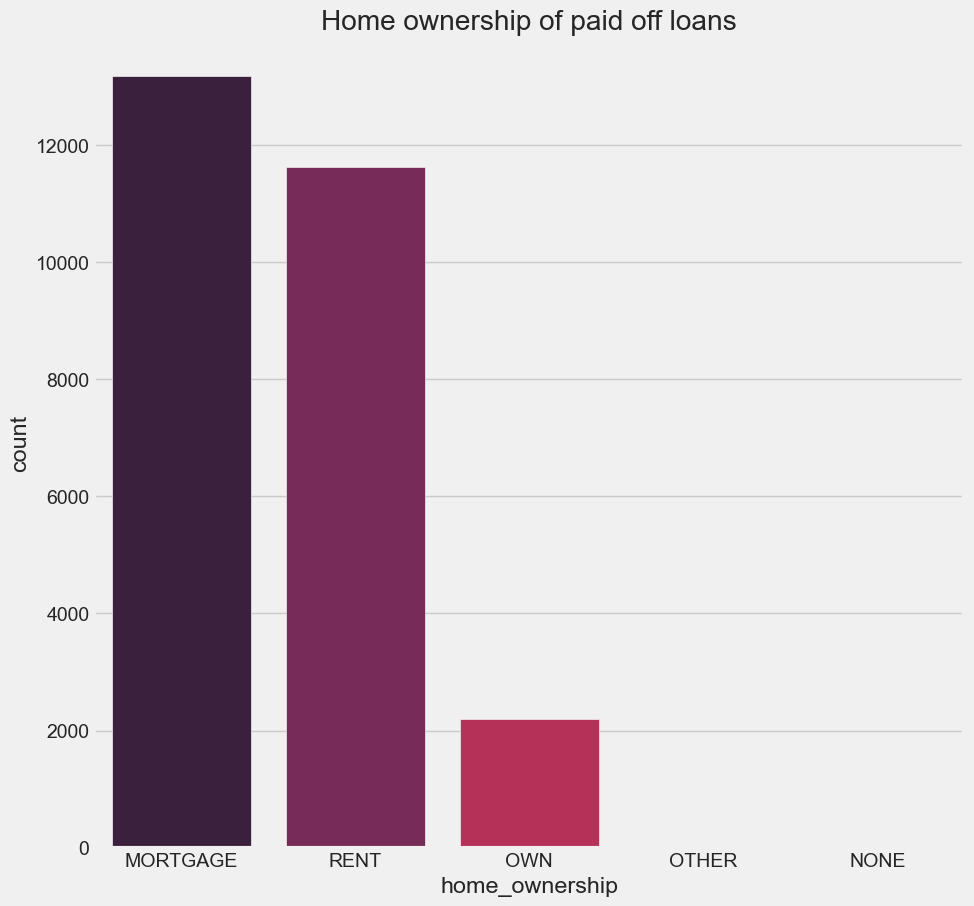

In [178]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x='home_ownership', data= fully_paid_df, order=fully_paid_df["home_ownership"].value_counts().index ,palette = 'rocket').set(title = 'Home ownership of paid off loans')
plt.show()



In [179]:
fully_paid_df.home_ownership.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

home_ownership
MORTGAGE    48.7%
RENT        43.0%
OWN          8.1%
OTHER        0.1%
NONE         0.0%
Name: proportion, dtype: object

C:\Users\danie\AppData\Local\Temp\ipykernel_26908\3982016687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='home_ownership', data= late_df, order=late_df["home_ownership"].value_counts().index ,palette = 'rocket').set(title = 'Home ownership of late loans')


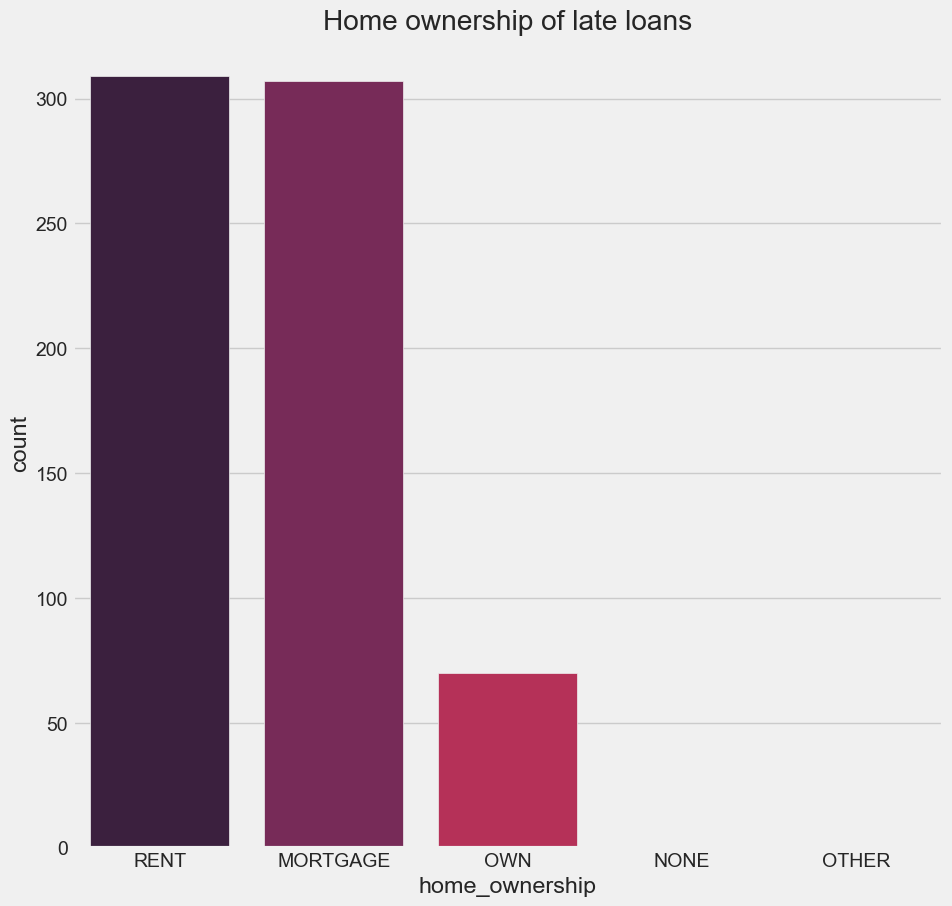

In [182]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x='home_ownership', data= late_df, order=late_df["home_ownership"].value_counts().index ,palette = 'rocket').set(title = 'Home ownership of late loans')
plt.show()



In [180]:
late_df.home_ownership.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

home_ownership
RENT        45.0%
MORTGAGE    44.8%
OWN         10.2%
NONE         0.0%
OTHER        0.0%
Name: proportion, dtype: object

C:\Users\danie\AppData\Local\Temp\ipykernel_26908\3611018706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='home_ownership', data= chargedoff_df, order=fully_paid_df["home_ownership"].value_counts().index ,palette = 'rocket').set(title = 'Home ownership of charged off loans')


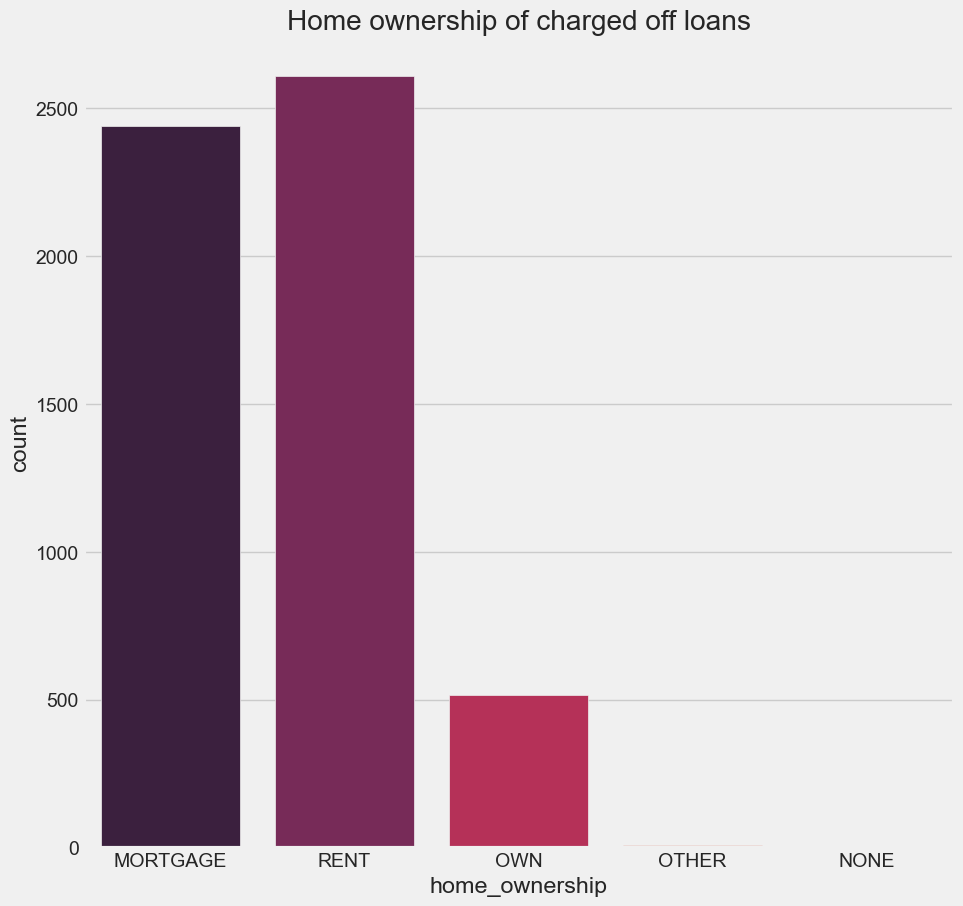

In [183]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x='home_ownership', data= chargedoff_df, order=fully_paid_df["home_ownership"].value_counts().index ,palette = 'rocket').set(title = 'Home ownership of charged off loans')
plt.show()



In [181]:
chargedoff_df.home_ownership.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

home_ownership
RENT        46.8%
MORTGAGE    43.8%
OWN          9.3%
OTHER        0.2%
NONE         0.0%
Name: proportion, dtype: object

We can see there are minimal differences in the home ownership status between the groups.
Overall, loan grade and purpose of loan seem to be more closely related to the likelihood a customer falls behind on payments or is charged off